In [14]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [15]:
logdir = "/home/sykwer/work/zenoh-bridge-dds/app2_ws/"

In [16]:
data_sizes = ["1KB", "10KB", "100KB", "1MB"]
data_sizes_sub = ["1024", "10240", "102400", "1024000"]
conditions = ["naive", "zenoh"]
ordered_labels = [
    "naive_1KB", "zenoh_1KB", 
    "naive_10KB", "zenoh_10KB", 
    "naive_100KB", "zenoh_100KB", 
    "naive_1MB", "zenoh_1MB"
]
data = {}

In [17]:
for condition in conditions:
    for i in range(len(data_sizes)):
        size = data_sizes[i]
        size_sub = data_sizes_sub[i]
        
        filename = condition + "_log_" + str(size_sub) + ".txt"
        with open(logdir + filename) as f:
            tmp = [float(line.strip()) for line in f]
            data[f"{condition}_{size}"] = [x / 1000000 for x in tmp]

In [18]:
data

{'naive_1KB': [0.165463,
  0.148821,
  0.14872,
  0.159322,
  0.145112,
  0.150231,
  0.148971,
  0.146956,
  0.147128,
  0.159195,
  0.147719,
  0.147519,
  0.146506,
  0.160208,
  0.148351,
  0.144835,
  0.14106,
  0.149281,
  0.147142,
  0.15849,
  0.146816,
  0.14881,
  0.143346,
  0.14639,
  0.149005,
  0.148147,
  0.15988,
  0.15917,
  0.143453,
  0.148,
  0.148248,
  0.146309,
  0.14871,
  0.166725,
  0.147192,
  0.146543,
  0.15272,
  0.134623,
  0.145074,
  0.159937,
  0.149805,
  0.124333,
  0.15416,
  0.151481,
  0.159398,
  0.122129,
  0.14477,
  0.157417,
  0.158194,
  0.143034,
  0.1457,
  0.146569,
  0.147502,
  0.166786,
  0.147443,
  0.144621,
  0.151715,
  0.15541,
  0.147016,
  0.149547,
  0.14999,
  0.141935,
  0.160121,
  0.147685,
  0.147836,
  0.145042,
  0.146929,
  0.137907,
  0.149142,
  0.152198,
  0.136485,
  0.164584,
  0.155333,
  0.146197,
  0.159064,
  0.145231,
  0.148115,
  0.15009,
  0.148403,
  0.145648,
  0.145855,
  0.167191,
  0.145387,
  0.141691

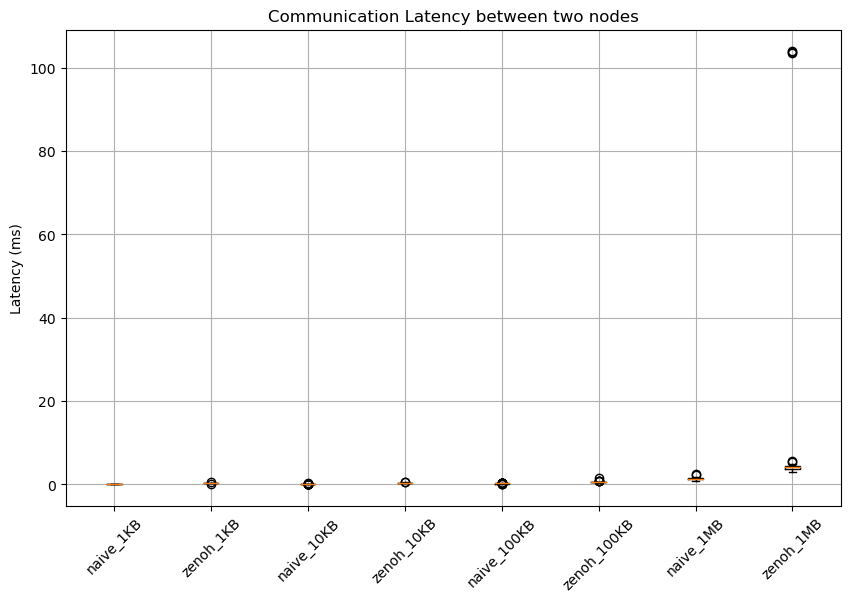

In [27]:
def visualize():
    fig, ax = plt.subplots(figsize=(10, 7))
    
    for i, label in enumerate(ordered_labels):
        ax.boxplot(data[label], positions=[i + 1], labels=[label])
        
    ax.set_title("Communication Latency between two nodes")
    ax.set_ylabel("Latency (ms)")
    
    plt.subplots_adjust(bottom=0.2)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.savefig("zenoh_overhead_not_cropped.pdf")
    plt.show()
    
visualize()

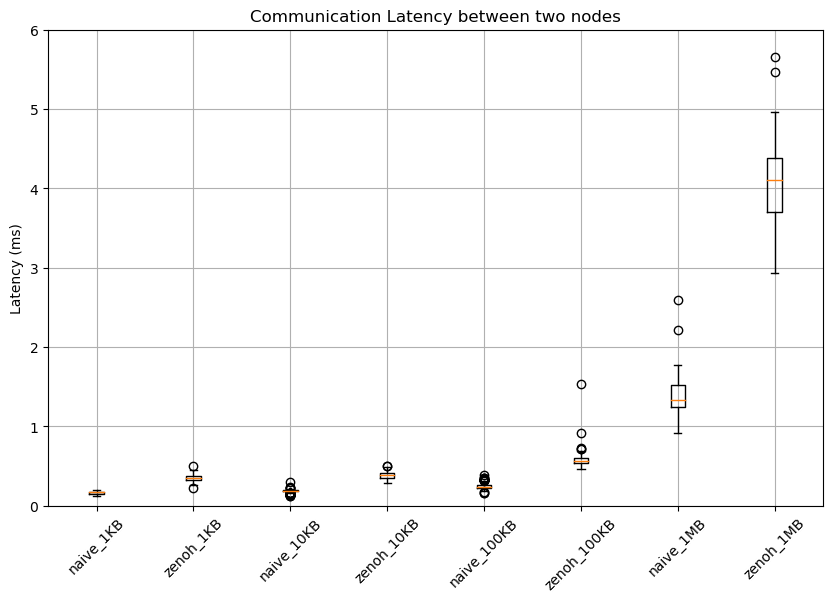

In [28]:
def visualize2():
    fig, ax = plt.subplots(figsize=(10, 7))
    
    for i, label in enumerate(ordered_labels):
        ax.boxplot(data[label], positions=[i + 1], labels=[label])
        
    ax.set_ylim(0, 6)
    
    ax.set_title("Communication Latency between two nodes")
    ax.set_ylabel("Latency (ms)")
    
    plt.subplots_adjust(bottom=0.2)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.savefig("zenoh_overhead.pdf")
    plt.show()
    
visualize2()